In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

/Users/standard/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Plotting & Visualization

## [1] matplotlib Primer

### [1.1] Figures & Subplots

#### Cumbersome Method

In [5]:
fig = plt.figure() ## Figure object

In [7]:
ax1 = fig.add_subplot(2, 2, 1)  ## creates empty 2x2 figure; subplot 1 object
ax2 = fig.add_subplot(2, 2, 2)  ## subplot 2 object
ax3 = fig.add_subplot(2, 2, 3)  ## subplot 3 object

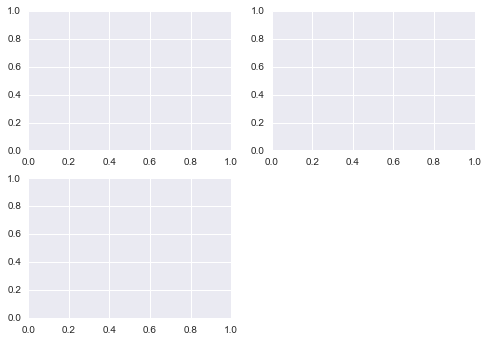

In [8]:
fig

In [9]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3);
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30));
ax3.plot(np.random.randn(50).cumsum(), 'k--');

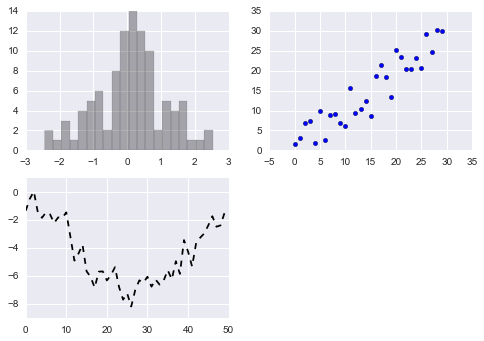

In [10]:
fig

#### Better Method

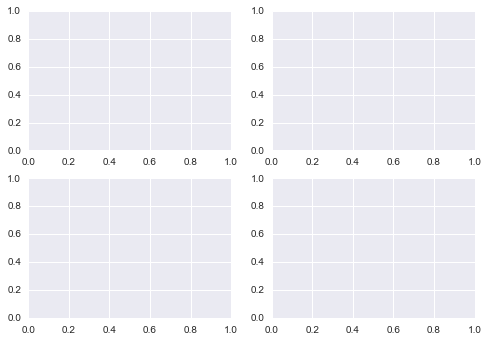

In [11]:
fig, axes = plt.subplots(2, 2, sharex=False, sharey=False)

In [15]:
_ = axes[0,0].hist(np.random.randn(100), bins=20, color='k', alpha=0.3);
axes[0,1].scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30));
axes[1,0].plot(np.random.randn(50).cumsum(), 'k--');
axes[1,1].plot(range(30), range(30));

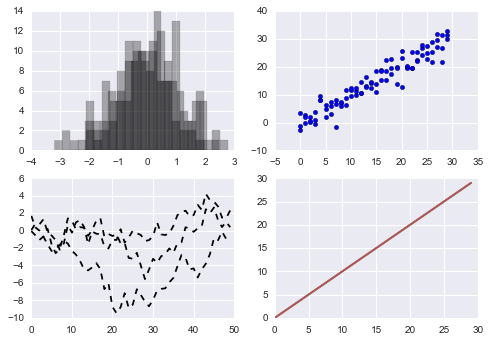

In [16]:
fig

### [1.2] Adjusting Spacing Around Subplots

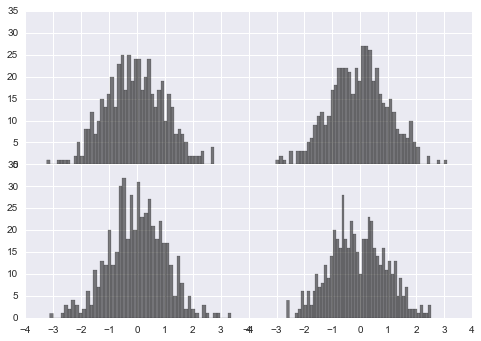

In [18]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)  ## removes width and height spacing, respectively

### [1.3] Colors, Markers, & Line Styles

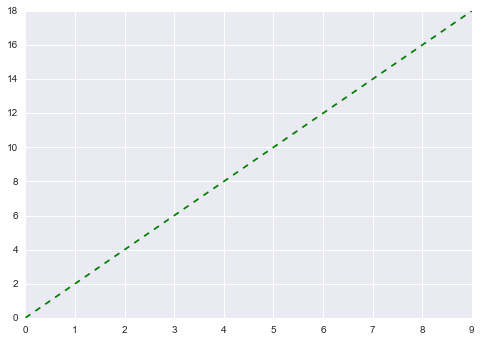

In [19]:
plt.plot(range(10), range(0, 20, 2), 'g--');

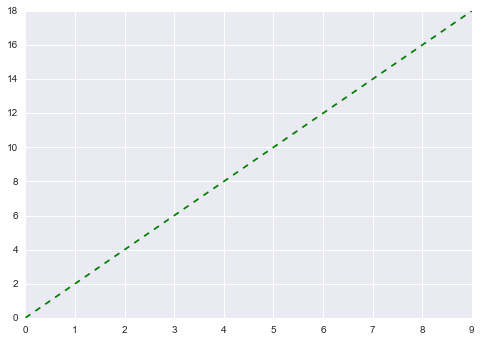

In [21]:
plt.plot(range(10), range(0, 20, 2), linestyle='--', color='g');  ## to separate linestyle and color

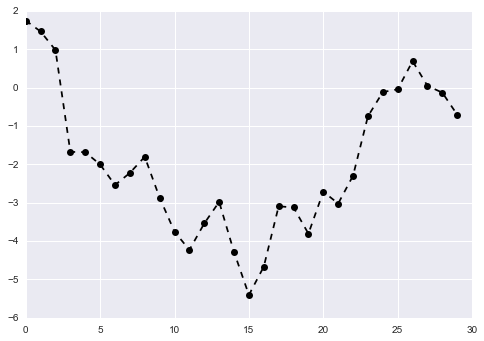

In [22]:
np.random.seed(11)
plt.plot(np.random.randn(30).cumsum(), 'ko--'); ## include data point markers

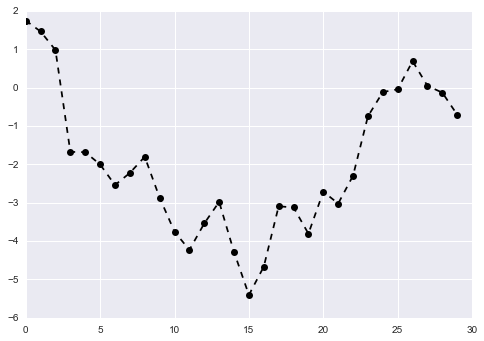

In [23]:
np.random.seed(11)
plt.plot(np.random.randn(30).cumsum(), linestyle='--', color='k', marker='o');  ## explicit version of graph above

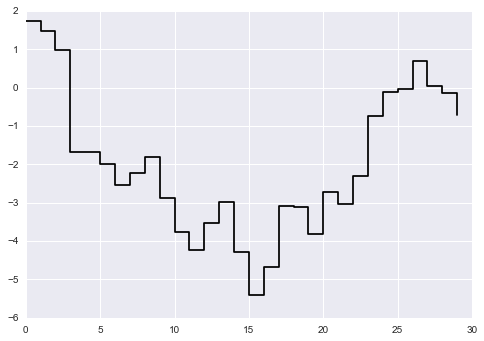

In [24]:
np.random.seed(11)
data = np.random.randn(30).cumsum()
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post');  ## use drawstyle to alter interpolation between pts

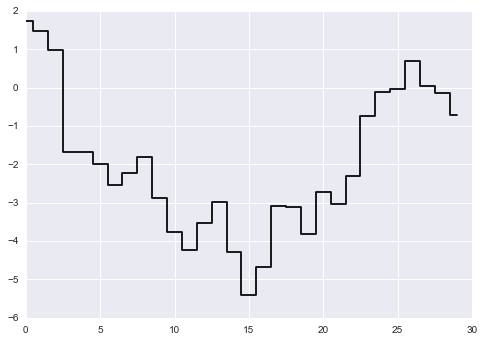

In [25]:
plt.plot(data, 'k-', drawstyle='steps-mid', label='steps-post');  ## use drawstyle to alter interpolation between pts

### [1.4] Ticks, Labels, & Legends

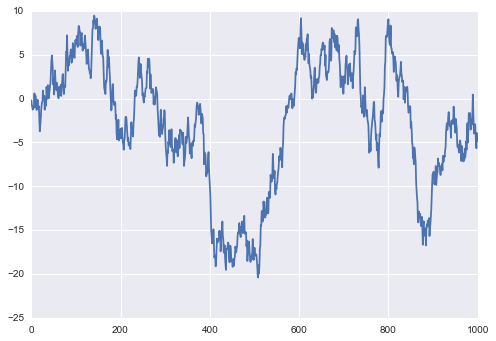

In [26]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum());

In [27]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])  ## select label positions
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=45, fontsize='small')  ## select label names

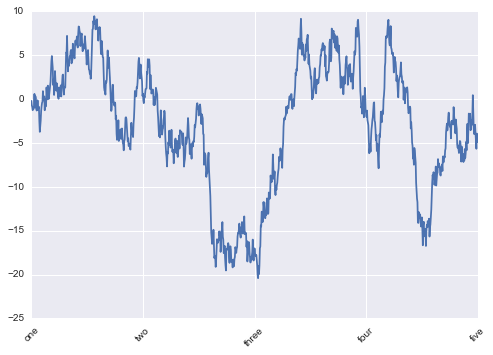

In [28]:
fig

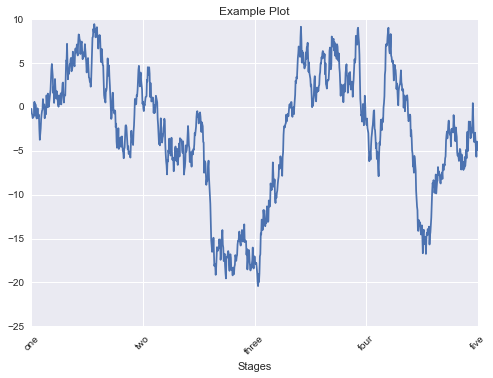

In [29]:
ax.set_title('Example Plot')  ## add title
ax.set_xlabel('Stages')  ## add x-axis label
fig

### [1.5] Adding Legends

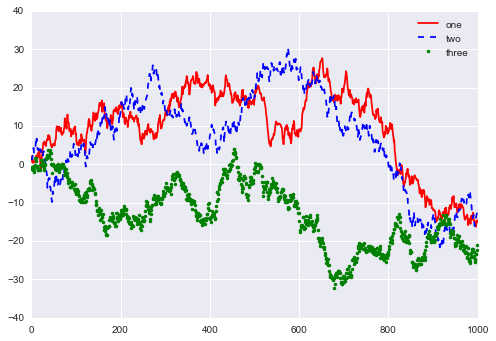

In [30]:
np.random.seed(10)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum(), 'r', label='one')
ax.plot(np.random.randn(1000).cumsum(), 'b--', label='two')
ax.plot(np.random.randn(1000).cumsum(), 'g.', label='three')
ax.legend(loc='best')

### [1.6] Annotations on a Subplot

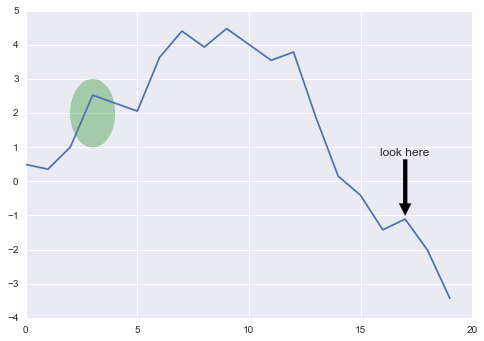

In [31]:
np.random.seed(42)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = np.random.randn(20).cumsum()

labels = ('here', 'no here', 'etc')
locations = (20, 50, 95)

ax.plot(data)
ax.annotate('look here', xy=(17, -1), 
           xytext=(17, 1),
           arrowprops=dict(facecolor='black'),
           horizontalalignment='center', verticalalignment='top')  ## add text + arrow

circ = plt.Circle((3, 2), 1, color='g', alpha=0.3)  ## add green circle
ax.add_patch(circ)

### [1.7] matplotlib Configuration

In [23]:
#plt.rc('figure', figsize=(8,8))  ## set global parameters

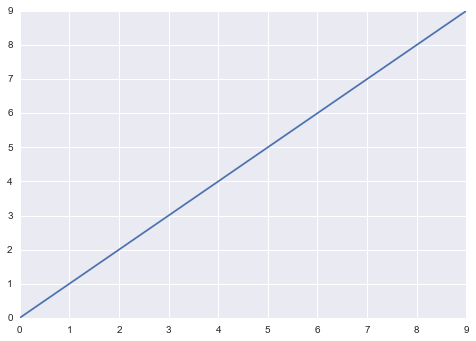

In [33]:
plt.plot(range(10));

## [2] Plotting w/pandas

### [2.1] Line Plots

In [34]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))

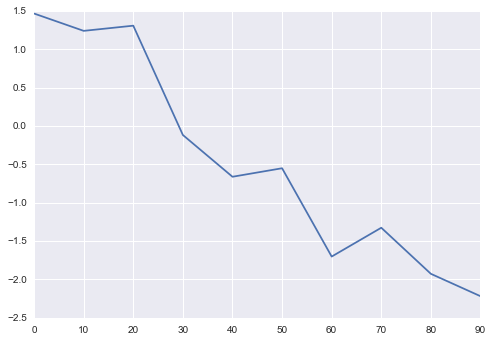

In [35]:
s.plot();

In [36]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), 
                  columns=['A', 'B', 'C', 'D'], 
                  index=np.arange(0, 100, 10))
df

,A,B,C,D
0,-0.601707,1.852278,-0.013497,-1.057711
10,0.220838,0.631435,0.195366,-3.017381
20,-1.107348,0.828296,0.933833,-2.846013
30,-1.222996,0.527192,-0.544689,-3.565857
40,-1.683635,1.584314,-0.201071,-5.328897
50,-1.359551,1.199232,-0.877993,-4.717221
60,-0.328551,2.130512,-1.717210,-5.026433
70,0.002712,3.106057,-2.196385,-5.212092
80,-1.103623,1.909851,-1.383859,-3.855852
90,-1.175633,2.913384,-1.022223,-4.500972


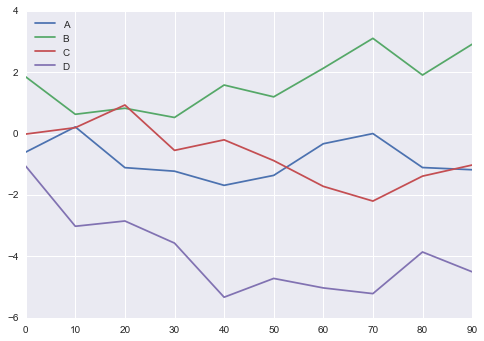

In [38]:
df.plot();

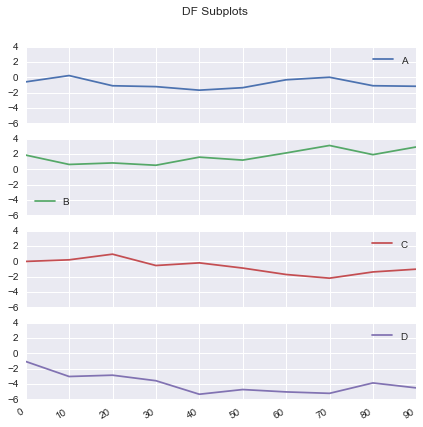

In [39]:
df.plot(subplots=True, figsize=(7, 7), sharex=True, sharey=True, title="DF Subplots");

### [2.2] Bar Plots

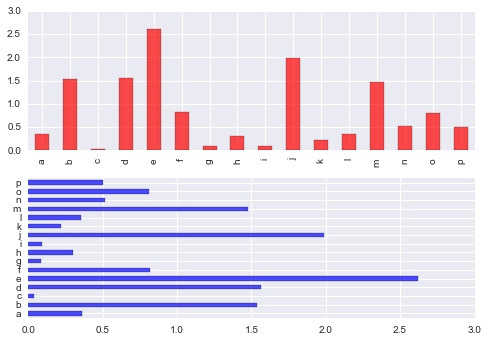

In [40]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(abs(np.random.randn(16)), index=list('abcdefghijklmnop'))
data.plot(kind='bar', ax=axes[0], color='r', alpha=0.7);
data.plot(kind='barh', ax=axes[1], color='b', alpha=0.7);

In [41]:
df = pd.DataFrame(abs(np.random.randn(6, 4)), 
                 index=['one', 'two', 'three', 'four', 'five', 'six'],
                 columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.915402,0.328751,0.529760,0.513267
two,0.097078,0.968645,0.702053,0.327662
three,0.392108,1.463515,0.296120,0.261055
four,0.005113,0.234587,1.415371,0.420645
five,0.342715,0.802277,0.161286,0.404051
six,1.886186,0.174578,0.257550,0.074446


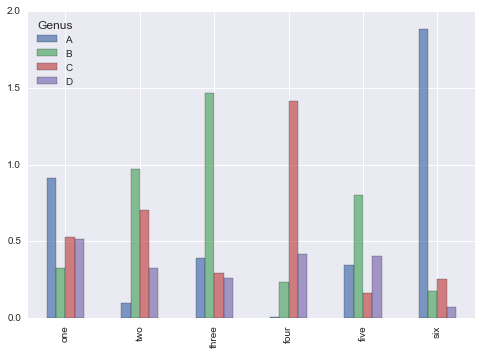

In [42]:
df.plot(kind='bar', alpha=0.7);

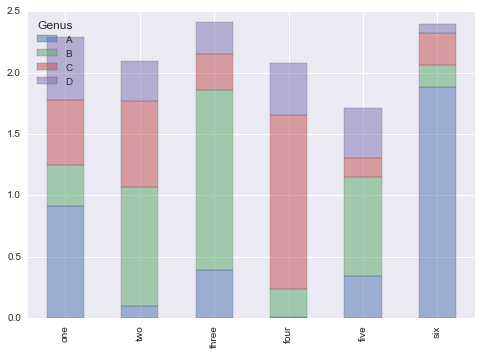

In [43]:
df.plot(kind='bar', stacked=True, alpha=0.5);

### [2.3] Histograms & Density Plots

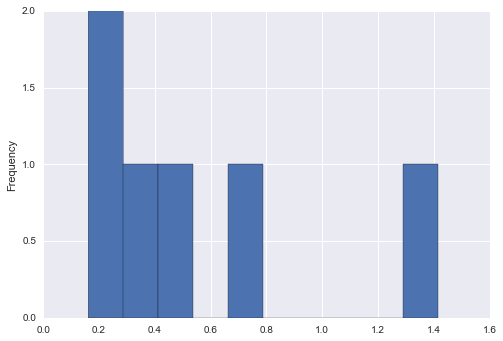

In [44]:
df.C.plot(kind='hist');

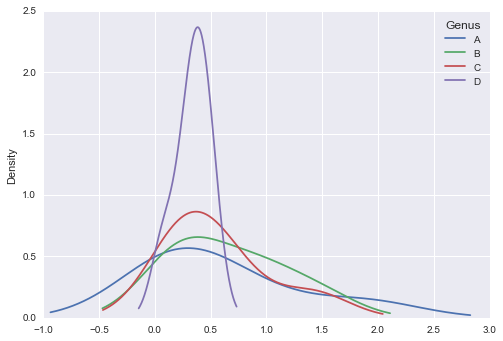

In [45]:
df.plot(kind='kde');

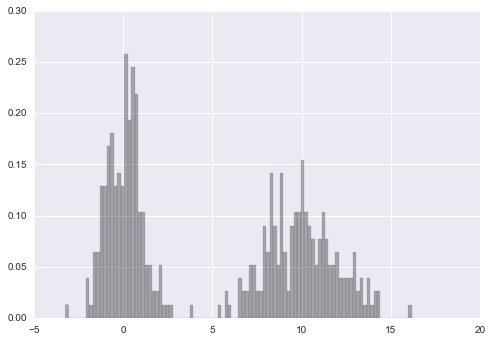

In [46]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
values.hist(bins=100, alpha=0.3, color='k', normed=True);

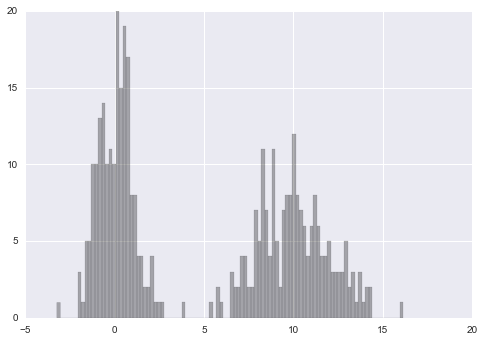

In [47]:
values.hist(bins=100, alpha=0.3, color='k', normed=False);

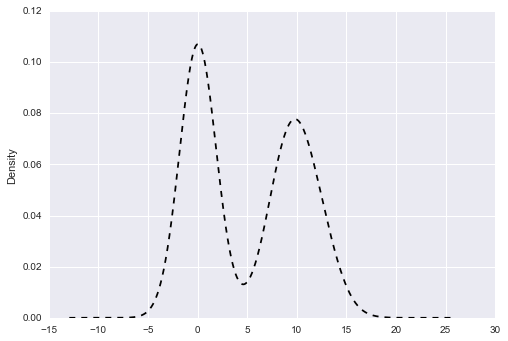

In [48]:
values.plot(kind='kde', style='k--');

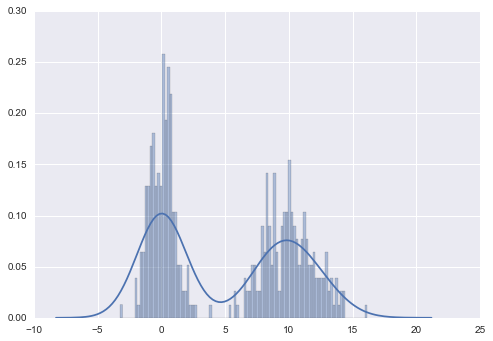

In [49]:
sns.distplot(values, bins=100);

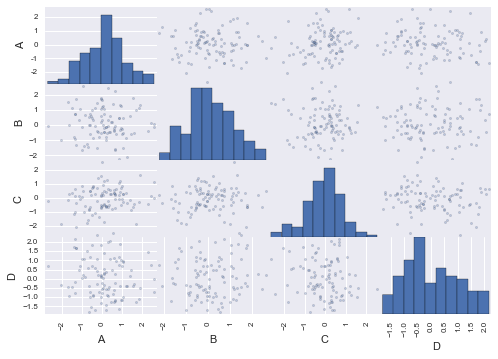

In [50]:
df = pd.DataFrame(np.random.randn(100, 4), 
                 columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
pd.scatter_matrix(df, diagonal='hist', color='k', alpha=0.3);

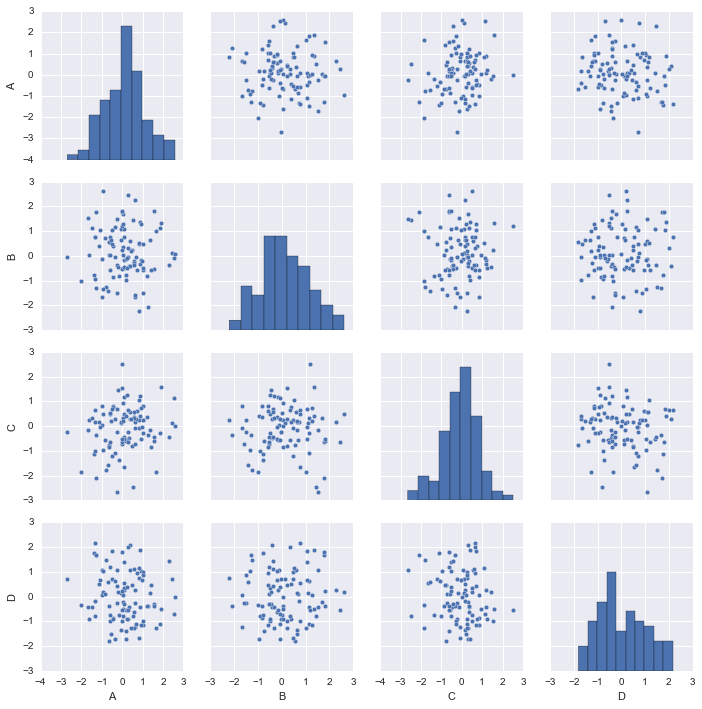

In [51]:
sns.pairplot(df);